In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(rc={'figure.figsize':(6,4)})
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data file

In [2]:
data = pd.read_csv('dataset/hour.csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
data.shape

(17379, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
round(data.describe(), 2)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.00,17379.00,17379.0,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
mean,8690.00,2.50,0.5,6.54,11.55,0.03,3.00,0.68,1.43,0.50,0.48,0.63,0.19,35.68,153.79,189.46
std,5017.03,1.11,0.5,3.44,6.91,0.17,2.01,0.47,0.64,0.19,0.17,0.19,0.12,49.31,151.36,181.39
min,1.00,1.00,0.0,1.00,0.00,0.00,0.00,0.00,1.00,0.02,0.00,0.00,0.00,0.00,0.00,1.00
25%,4345.50,2.00,0.0,4.00,6.00,0.00,1.00,0.00,1.00,0.34,0.33,0.48,0.10,4.00,34.00,40.00
50%,8690.00,3.00,1.0,7.00,12.00,0.00,3.00,1.00,1.00,0.50,0.48,0.63,0.19,17.00,115.00,142.00
75%,13034.50,3.00,1.0,10.00,18.00,0.00,5.00,1.00,2.00,0.66,0.62,0.78,0.25,48.00,220.00,281.00
max,17379.00,4.00,1.0,12.00,23.00,1.00,6.00,1.00,4.00,1.00,1.00,1.00,0.85,367.00,886.00,977.00


# Check for null values in the data and drop records with NAs

In [6]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
data.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [8]:
# no null value so no need to drop
# data = data.dropna().reset_index(drop=True)

# Sanity checks

	1. Check if registered + casual = cnt for all the records. If not, the row is junk and should be dropped. 

In [9]:
data.drop(data[(data['registered'] + data['casual'] != data['cnt']) ].index, inplace = True)
data.shape

(17379, 17)

	2. Month values should be 1-12 only

In [10]:
round(data['mnth'].describe(), 2)

count    17379.00
mean         6.54
std          3.44
min          1.00
25%          4.00
50%          7.00
75%         10.00
max         12.00
Name: mnth, dtype: float64

	3. Hour values should be 0-23

In [11]:
round(data['hr'].describe(), 2)

count    17379.00
mean        11.55
std          6.91
min          0.00
25%          6.00
50%         12.00
75%         18.00
max         23.00
Name: hr, dtype: float64

# The variables ‘casual’ and ‘registered’ are redundant and need to be dropped. ‘Instant’ is the index and needs to be dropped too. The date column dteday will not be used in the model building, and therefore needs to be dropped. Create a new dataframe named inp1.

In [12]:
inp1 = data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
inp1.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


# Univariate analysis

- Describe the numerical fields in the dataset using pandas describe method

In [13]:
round(inp1.describe(), 2)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.00,17379.0,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
mean,2.50,0.5,6.54,11.55,0.03,3.00,0.68,1.43,0.50,0.48,0.63,0.19,189.46
std,1.11,0.5,3.44,6.91,0.17,2.01,0.47,0.64,0.19,0.17,0.19,0.12,181.39
min,1.00,0.0,1.00,0.00,0.00,0.00,0.00,1.00,0.02,0.00,0.00,0.00,1.00
25%,2.00,0.0,4.00,6.00,0.00,1.00,0.00,1.00,0.34,0.33,0.48,0.10,40.00
50%,3.00,1.0,7.00,12.00,0.00,3.00,1.00,1.00,0.50,0.48,0.63,0.19,142.00
75%,3.00,1.0,10.00,18.00,0.00,5.00,1.00,2.00,0.66,0.62,0.78,0.25,281.00
max,4.00,1.0,12.00,23.00,1.00,6.00,1.00,4.00,1.00,1.00,1.00,0.85,977.00


- Make density plot for temp. This would give a sense of the centrality and the spread of the distribution

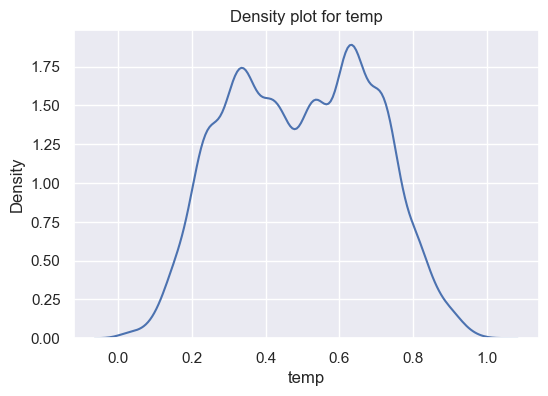

In [14]:
sns.kdeplot(data=inp1, x="temp")
plt.title('Density plot for temp')
plt.xlabel('temp')
plt.show()

- Boxplot for atemp 

	- Are there any outliers?


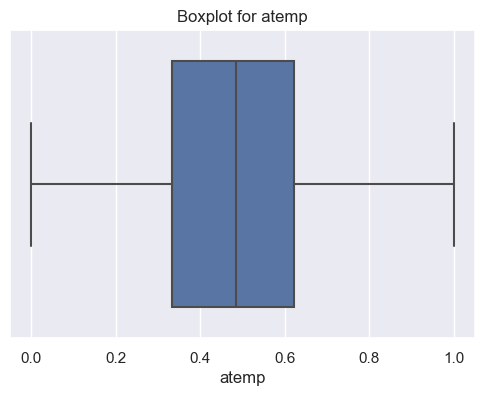

In [15]:
sns.boxplot(data=inp1, x="atemp")
plt.title('Boxplot for atemp')
plt.xlabel('atemp')
plt.show()

- **observation** : There are no outliers.

- Histogram for hum

	- Do you detect any abnormally high values?

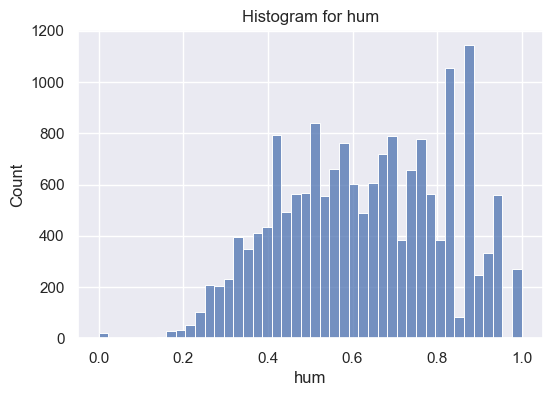

In [16]:
sns.histplot(data=inp1, x="hum")
plt.title('Histogram for hum')
plt.xlabel('hum')
plt.show()

- Density plot for windspeed

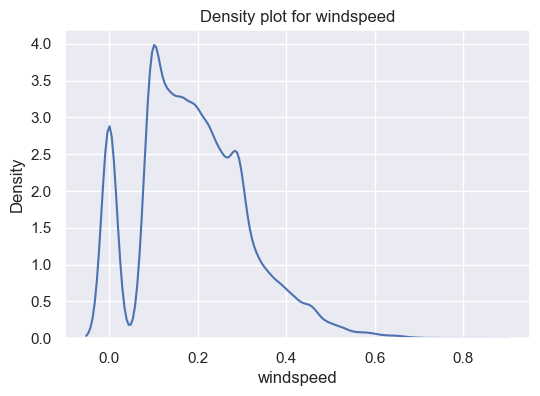

In [17]:
sns.kdeplot(data=inp1, x="windspeed")
plt.title('Density plot for windspeed')
plt.xlabel('windspeed')
plt.show()

- Box and density plot for cnt – this is the variable of interest 

	- Do you see any outliers in the boxplot? 

    - Does the density plot provide a similar insight?


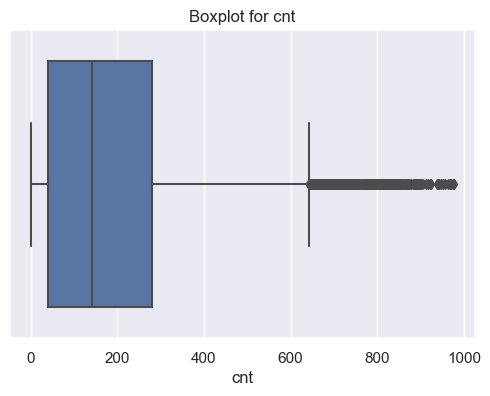

In [18]:
sns.boxplot(data=inp1, x="cnt")
plt.title('Boxplot for cnt')
plt.xlabel('cnt')
plt.show()

 - **observation** : Yes, outliers are in the boxplot

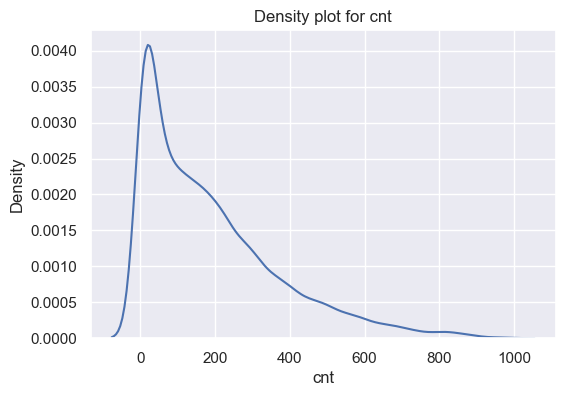

In [19]:
sns.kdeplot(data=inp1, x="cnt")
plt.title('Density plot for cnt')
plt.xlabel('cnt')
plt.show()

 - **observation** : Yes, density plot provide a similar insight

# Outlier treatment

1. Cnt looks like some hours have rather high values. You’ll need to treat these outliers so that they don’t skew the analysis and the model. 

	1. Find out the following percentiles: 10, 25, 50, 75, 90, 95, 99
        
	2. Decide the cutoff percentile and drop records with values higher than the cutoff. Name the new dataframe as inp2

In [20]:
inp1['cnt'].quantile([.1, .25, .5, .75, .90, .95, .99]) 

0.10      9.00
0.25     40.00
0.50    142.00
0.75    281.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: cnt, dtype: float64

- **observation** : 563 is the 95th percentile – only 5% records have a value higher than this. Taking this as the cutoff.

In [21]:
inp2 = inp1[inp1['cnt'] < 563].copy()
inp2.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [22]:
inp2.shape

(16502, 13)

# Bivariate analysis

1.	Make boxplot for cnt vs. hour
	1.	What kind of pattern do you see?


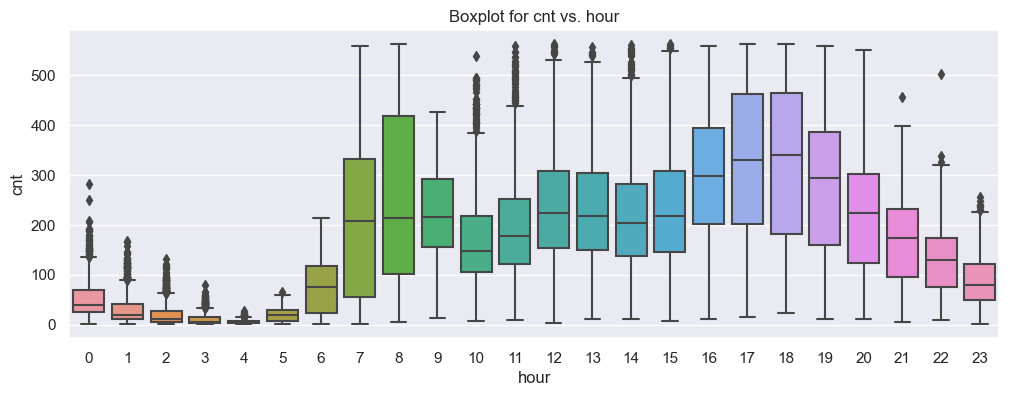

In [23]:
sns.set(rc={'figure.figsize':(12,4)})

sns.boxplot(data=inp2, x="hr", y="cnt")
plt.title('Boxplot for cnt vs. hour')
plt.xlabel('hour')
plt.ylabel('cnt')
plt.show()

2.	Make boxplot for cnt vs. weekday
	1.	Is there any difference in the rides by days of the week?


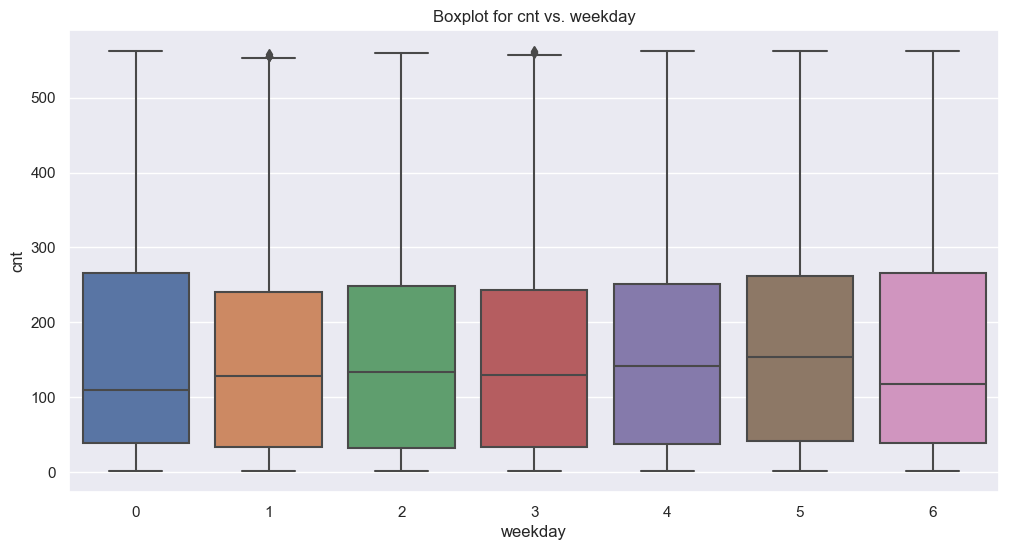

In [24]:
sns.set(rc={'figure.figsize':(12,6)})

sns.boxplot(data=inp2, x="weekday", y="cnt")
plt.title('Boxplot for cnt vs. weekday')
plt.xlabel('weekday')
plt.ylabel('cnt')
plt.show()

3.	Make boxplot for cnt vs. month
	1.	Look at the median values. Any month(s) that stand out?


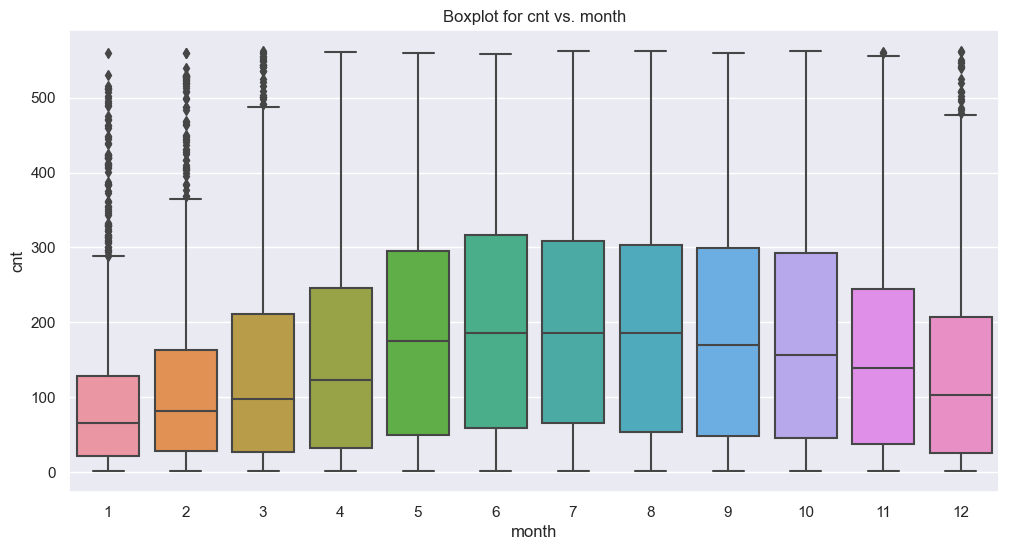

In [25]:
sns.set(rc={'figure.figsize':(12,6)})

sns.boxplot(data=inp2, x="mnth", y="cnt")
plt.title('Boxplot for cnt vs. month')
plt.xlabel('month')
plt.ylabel('cnt')
plt.show()

- **observation** : end of winter / early spring months have the least bike riding instances.

4.	Make boxplot for cnt vs. season
	1.	Which season has the highest rides in general? Expected?


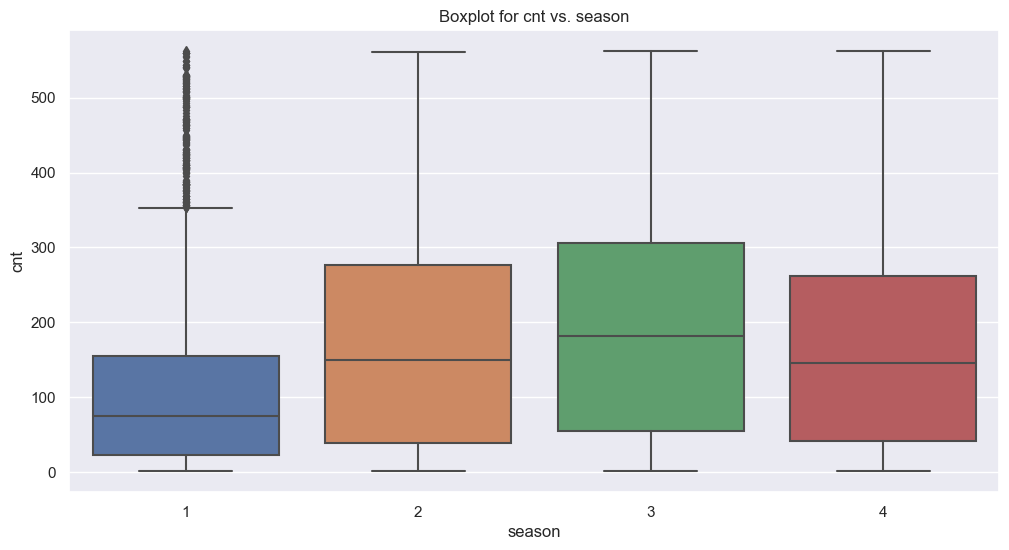

In [26]:
sns.set(rc={'figure.figsize':(12,6)})

sns.boxplot(data=inp2, x="season", y="cnt")
plt.title('Boxplot for cnt vs. season')
plt.xlabel('season')
plt.ylabel('cnt')
plt.show()

5.	Make a bar plot with the median value of cnt for each hr
	1.	Does this paint a different picture from the box plot?


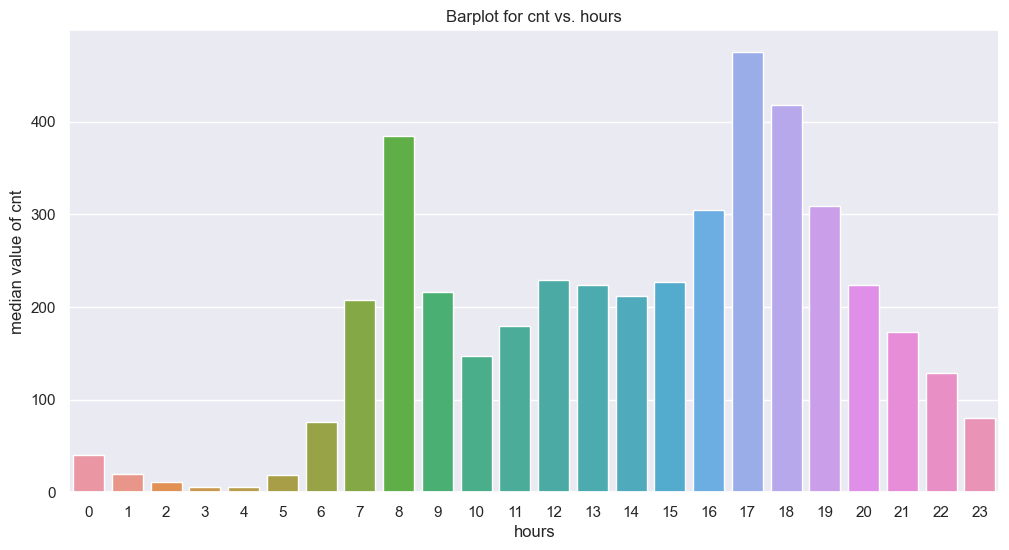

In [27]:
median_values = pd.DataFrame(dict(data.groupby('hr')['cnt'].median()).items(), columns=['hours', 'cnt'])
sns.barplot(data=median_values, x='hours', y='cnt') 

plt.title('Barplot for cnt vs. hours')
plt.xlabel('hours')
plt.ylabel('median value of cnt')
plt.show()


6.	Make a correlation matrix for variables atemp, temp, hum, and windspeed
	1.	Which variables have the highest correlation?


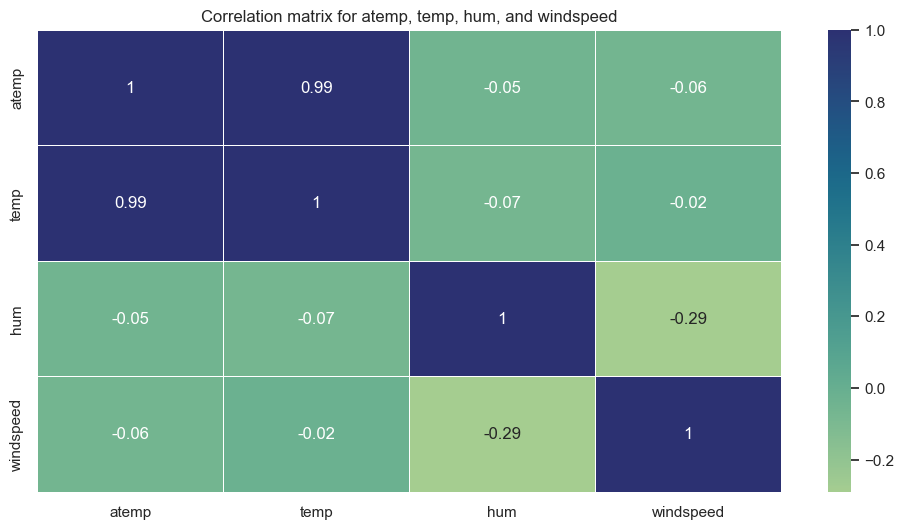

In [28]:
corr_mat = data[['atemp', 'temp', 'hum', 'windspeed']]
sns.heatmap(round(corr_mat.corr(),2), annot=True, cmap="crest", linewidth=.5)

plt.title('Correlation matrix for atemp, temp, hum, and windspeed')
plt.show()


# Data preprocessing

A few key considerations for the preprocessing: 

	There are plenty of categorical features. Since these categorical features can’t be used in the predictive model, you need to convert to a suitable numerical representation. Instead of creating dozens of new dummy variables, try to club levels of categorical features wherever possible. For a feature with high number of categorical levels, you can club the values that are very similar in value for the target variable. 

1.	Treating mnth column
	1.	For values 5,6,7,8,9,10, replace with a single value 5. This is because these have very similar values for cnt.
	
    2.	Get dummies for the updated 6 mnth values


In [29]:
inp2['mnth'][inp2['mnth'].isin([5, 6, 7, 8, 9, 10])] = 5
inp2['mnth'].unique()

C:\Users\munge\AppData\Local\Temp\ipykernel_7492\1389378270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp2['mnth'][inp2['mnth'].isin([5, 6, 7, 8, 9, 10])] = 5


array([ 1,  2,  3,  4,  5, 11, 12], dtype=int64)

In [30]:
inp2 = pd.get_dummies(inp2, columns=['mnth'], drop_first=True)
inp2

,season,yr,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,mnth_2,mnth_3,mnth_4,mnth_5,mnth_11,mnth_12
0,1,0,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16,0,0,0,0,0,0
1,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40,0,0,0,0,0,0
2,1,0,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32,0,0,0,0,0,0
3,1,0,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13,0,0,0,0,0,0
4,1,0,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119,0,0,0,0,0,1
17375,1,1,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89,0,0,0,0,0,1
17376,1,1,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90,0,0,0,0,0,1
17377,1,1,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61,0,0,0,0,0,1


2.	Treating hr column
	1.	Create new mapping: 0-5: 0, 11-15: 11; other values are untouched. Again, the bucketing is done in a way that hr values with similar levels of cnt are treated the same.


In [31]:
inp2['hr'][inp2['hr'].isin([0, 1, 2, 3, 4, 5])] = 0
inp2['hr'][inp2['hr'].isin([11, 12, 13, 14, 15])] = 11
inp2['hr'].unique()

C:\Users\munge\AppData\Local\Temp\ipykernel_7492\1443706925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp2['hr'][inp2['hr'].isin([0, 1, 2, 3, 4, 5])] = 0
C:\Users\munge\AppData\Local\Temp\ipykernel_7492\1443706925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp2['hr'][inp2['hr'].isin([11, 12, 13, 14, 15])] = 11


array([ 0,  6,  7,  8,  9, 10, 11, 16, 17, 18, 19, 20, 21, 22, 23],
      dtype=int64)

3.	Get dummy columns for season, weathersit, weekday, mnth, and hr. You needn’t club these further as the levels seem to have different values for the median cnt, when seen from the box plots.

In [32]:
cat_cols = ['season', 'weathersit', 'weekday', 'hr']
inp2 = pd.get_dummies(inp2, columns=cat_cols, drop_first=True)
inp2.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_11', 'mnth_12',
       'season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3',
       'weathersit_4', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22',
       'hr_23'],
      dtype='object')

# Train test split: Apply 70-30 split.

- call the new dataframes df_train and df_test


In [33]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [34]:
df = inp2.copy()

df_train = df.drop('cnt', axis=1)
df_test = df['cnt']

# Separate X and Y for df_train and df_test. For example, you should have X_train, y_train from df_train. y_train should be the cnt column from inp3 and X_train should be all other columns.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_test, test_size=0.3, random_state=41)

In [36]:
X_train.shape[0], X_test.shape[0]

(11551, 4951)

# Model building

- Use linear regression as the technique

- Report the R2 on the train set


In [37]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

In [38]:
R2_train = round(LR_model.score(X_train, y_train), 3)
print("The R2 value of the Training Set is : {}".format(R2_train))

The R2 value of the Training Set is : 0.665


# Make predictions on test set and report R2.

In [39]:
R2_test = round(LR_model.score(X_test, y_test), 3)
print("The R2 value of the Testing Set is : {}".format(R2_test))

The R2 value of the Testing Set is : 0.675
